## Import required modules

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os 
from mpl_toolkits.axes_grid1 import make_axes_locatable

import session_info
session_info.show()

In [4]:
# import a module given the full path?
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/ver8regions_torepo/_utils.py")
_utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = _utils
spec.loader.exec_module(_utils)

## Prepare functions

In [30]:
# function from Emma Dann
# to put scale bar

from matplotlib_scalebar.scalebar import ScaleBar

def get_pixel_size_visium(adata, library_id, spot_diameter_real = 55, img='hires'):
    '''
    Utility function to get size of pixels from visium image in AnnData.
    Useful to plot scalebars with matplotlib_scalebar.ScaleBar
    
    Params:
    -------
    - adata: AnnData object storing image info in adata.uns[spatial]
    - library_id: string storing ID for image, must be a key in adata.uns[spatial]
    - spot_diameter_real: numeric storing real diameter of spot, in whatever unit you need 
        (default is 55, for 55 microns of Visium 10X spots)
    - img: which image to use
    '''

    ## get scale factor converting original pixel positions (adata.obsm['spatial']) to 
    # pixel positions in image
    scalef = adata.uns['spatial'][library_id]['scalefactors']['tissue_{i}_scalef'.format(i=img)]
    ## get spot diameter in image pixels
    spot_diameter_img = adata.uns['spatial'][library_id]['scalefactors']['spot_diameter_fullres'] * scalef
    ## Calculate pixel size
    pixel_size_real = spot_diameter_real/spot_diameter_img
    return(pixel_size_real)


## Variables

In [3]:
### ver 20220718 ###

colormap='tab20'
palette={}
palette['adipose_tissue']=plt.get_cmap(colormap).colors[0]
palette['endocardium']=plt.get_cmap(colormap).colors[1]
palette['epicardium_subepicardium']=plt.get_cmap(colormap).colors[2]
palette['fibrosis']=plt.get_cmap(colormap).colors[3]
palette['myocardium']=plt.get_cmap(colormap).colors[5]
palette['nerve']=plt.get_cmap(colormap).colors[4]
palette['node']=plt.get_cmap(colormap).colors[6]
palette['vessel']=plt.get_cmap(colormap).colors[7]
palette['AV_bundle']=plt.get_cmap(colormap).colors[8]
palette['myocardium_atrial']=plt.get_cmap(colormap).colors[9]
palette['myocardium_ventricular']=plt.get_cmap(colormap).colors[10]
palette['cardiac_skeleton']=plt.get_cmap(colormap).colors[11]

## Read in anndata

In [5]:
adata_vis = _utils.read_visium('/nfs/team205/heart/cell2location/cell2location_map/IVS_BASAL_LV/AX_latest/sp.h5ad')
adata_vis

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


AnnData object with n_obs × n_vars = 2843 × 11378
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'annotation_JC', '_scvi_batch', '_scvi_labels', '_indices', 'annotation_final', 'Purkinje_cell', 'vCM1', 'vCM2', 'vCM3_stressed_stressed', 'vCM4', 'vCM5', 'EC1_cap', 'EC2_cap', 'EC3_cap', 'EC4_immune', 'EC5_art', 'EC6_ven', 'EC7_endocardial', 'EC8_ln', 'EC9_FB-like', 'EC10_CMC-like', 'PC1_vent', 'PC2_atria', 'PC3_str', 'PC4_CMC-like', 'SMC1_basic', 'SMC2_art', 'FB1', 'FB2', 'FB3', 'FB4_activated_activated', 'FB5', 'FB6', 'Meso', 'Adip1', 'Adip2', 'Adip3', 'Adip4', 'NC1_glial_glial', 'NC2_glial_NGF+_glial_NGF+', 'CD4+T_naive', 'CD4+T_act', 'CD4+T_Th1', 'CD4+T_Th2', 'CD4+T_Tfh', 'CD4+T_reg', 'CD8+T_cytox', 'CD8+T_em', 'CD8+T_te', 'CD8+T_trans'

In [5]:
category_name='annotation_final'

In [6]:
sc.set_figure_params(dpi=300)

In [7]:
adata_vis.X.data[:10]

array([1.3377782, 1.3377782, 1.8902669, 1.3377782, 1.3377782, 2.5048947,
       2.2440767, 1.3377782, 1.8902669, 1.8902669], dtype=float32)

## Plot

In [10]:
slide = adata_vis.copy()

In [ ]:
lib_id = [x for x in slide.uns['spatial'].keys()][0]
pix_size = get_pixel_size_visium(slide, lib_id)


fig, ax = plt.subplots()
sc.set_figure_params(scanpy=True, fontsize=24, dpi=200)
sc.pl.spatial(slide,cmap='RdPu',color=category_name, ncols=5, wspace=0,
              size=0,img_key='hires',alpha_img=1,vmin=0, vmax='p99.4', legend_loc=None, 
              title=f'{list(rep_slide_dict.keys()).index(reg)+1}: {reg}', show=False, ax=ax 
              # f'{reg}, {n_slide}slides'
scalebar = ScaleBar(pix_size, "um", length_fraction=0.25, frameon=False, location='upper right')
ax.add_artist(scalebar)
    
fig.savefig(f'./figures/Visium-HE_{reg}.pdf')

In [33]:
?ScaleBar

Init signature:
ScaleBar(
    dx,
    units='m',
    dimension='si-length',
    label=None,
    length_fraction=None,
    height_fraction=None,
    width_fraction=None,
    location=None,
    loc=None,
    pad=None,
    border_pad=None,
    sep=None,
    frameon=None,
    color=None,
    box_color=None,
    box_alpha=None,
    scale_loc=None,
    label_loc=None,
    font_properties=None,
    label_formatter=None,
    scale_formatter=None,
    fixed_value=None,
    fixed_units=None,
    animated=False,
    rotation=None,
)
Docstring:     
Abstract base class for objects that render into a FigureCanvas.

Typically, all visible elements in a figure are subclasses of Artist.
Init docstring:
Creates a new scale bar.

There are two modes of operation:

  1. Length, value and units of the scale bar are automatically
     determined based on the specified pixel size *dx* and
     *length_fraction*. The value will only take the following numbers:
     1, 2, 5, 10, 15, 20, 25, 50, 75, 100, 125, 

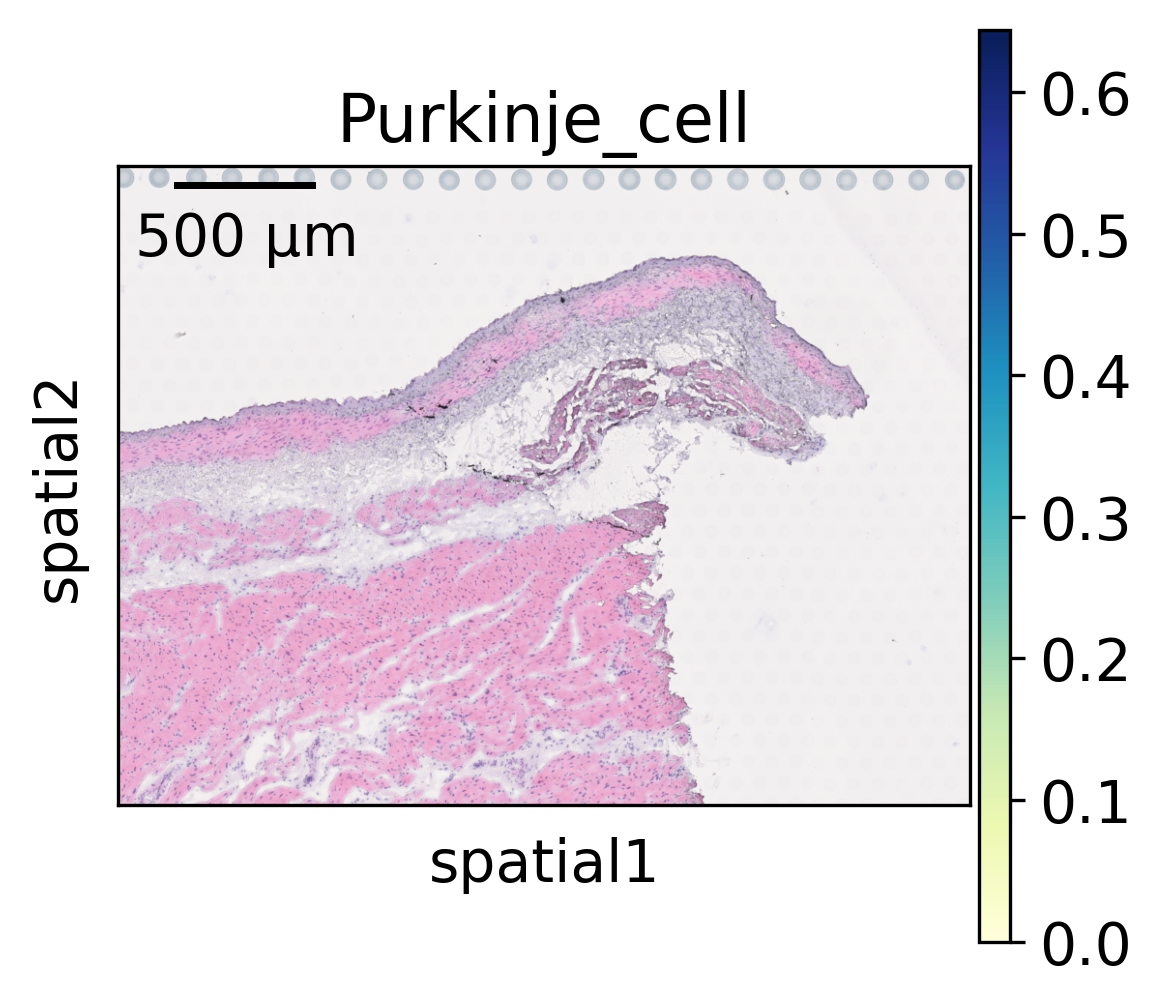

In [39]:
lib_id = [x for x in slide.uns['spatial'].keys()][0]
pix_size = get_pixel_size_visium(slide, lib_id)

fig, ax = plt.subplots()
# sc.set_figure_params(scanpy=True, fontsize=24, dpi=200)
with mpl.rc_context({'figure.figsize': [3, 3],
                            'axes.titlesize':16,}):
    sc.pl.spatial(slide,cmap='YlGnBu',
                  color=['Purkinje_cell'], 
                  ncols=6, wspace=0.25,
                  size=0,img_key='hires',alpha_img=1,vmin=0, vmax='p99.4',
                  # save='_Purkinje-cell_HE.pdf',
                  crop_coord=[7000, 15000, 1000, 7000],
                  show=False, ax=ax
                 )
scalebar = ScaleBar(pix_size, "um", length_fraction=0.25, frameon=False, location='upper left')
ax.add_artist(scalebar)
fig.savefig(f'./figures/show_Purkinje-cell_HE.pdf')

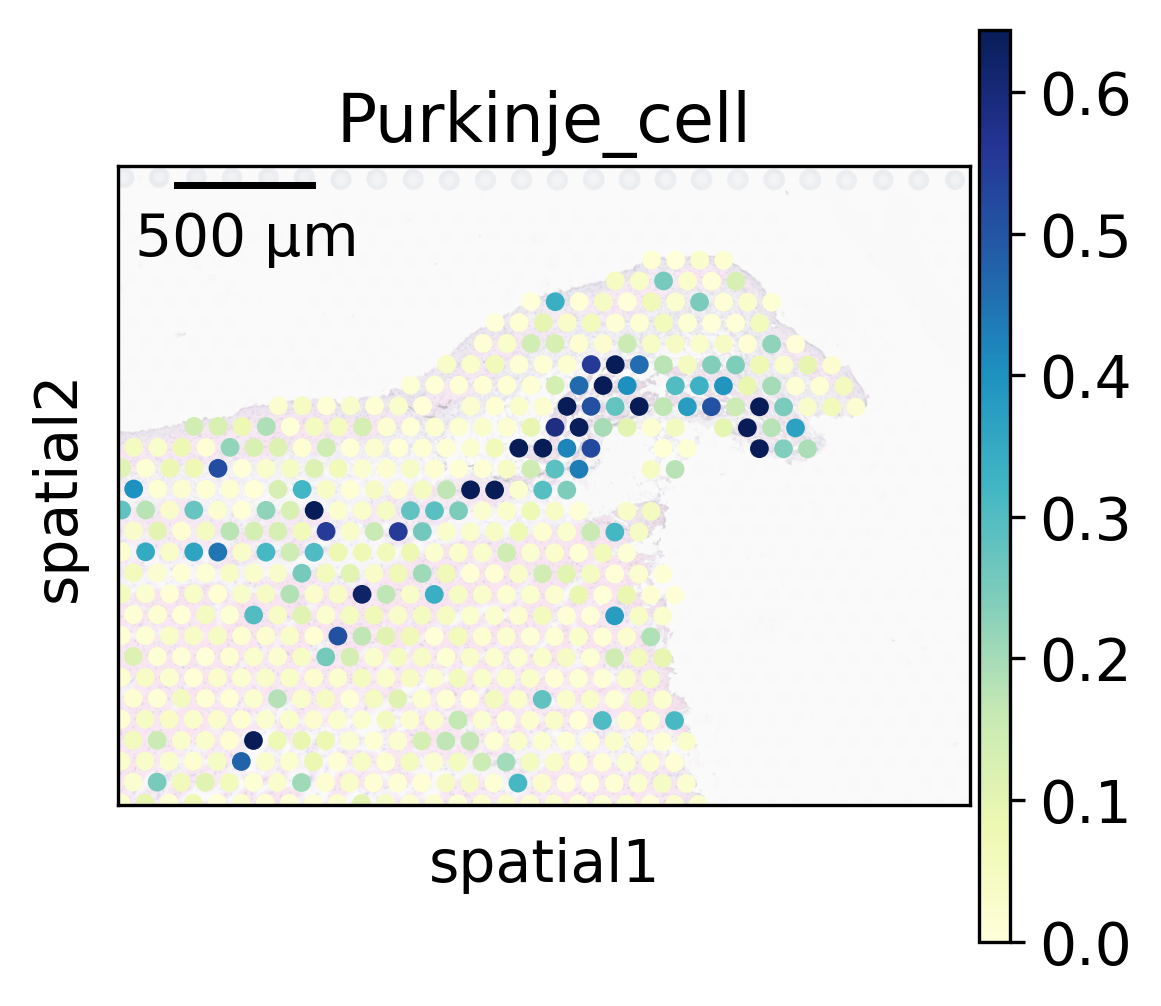

In [40]:
lib_id = [x for x in slide.uns['spatial'].keys()][0]
pix_size = get_pixel_size_visium(slide, lib_id)

fig, ax = plt.subplots()
# sc.set_figure_params(scanpy=True, fontsize=24, dpi=200)
with mpl.rc_context({'figure.figsize': [3, 3],
                            'axes.titlesize':16,}):
    sc.pl.spatial(slide,cmap='YlGnBu',
                  color=['Purkinje_cell'], 
                  ncols=6, wspace=0.25,
                  size=1.2,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',
                  # save='_Purkinje-cell_HE.pdf',
                  crop_coord=[7000, 15000, 1000, 7000],
                  show=False, ax=ax
                 )
scalebar = ScaleBar(pix_size, "um", length_fraction=0.25, frameon=False, location='upper left')
ax.add_artist(scalebar)
fig.savefig(f'./figures/show_Purkinje-cell.pdf')

In [ ]:
slide

In [34]:
pix_size

3.399698853368316

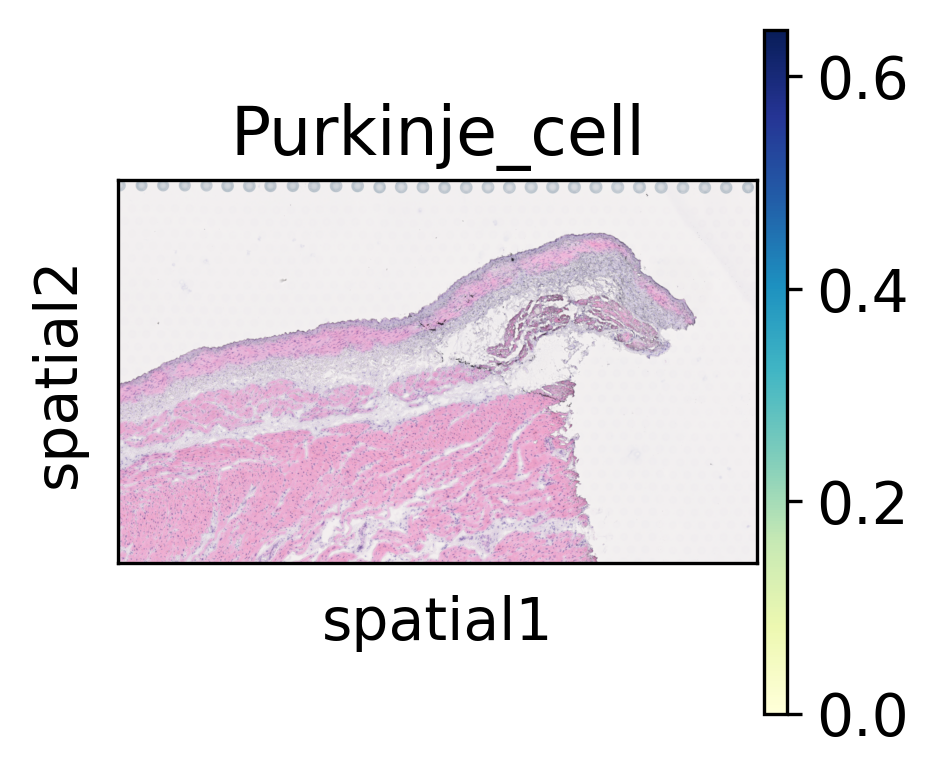

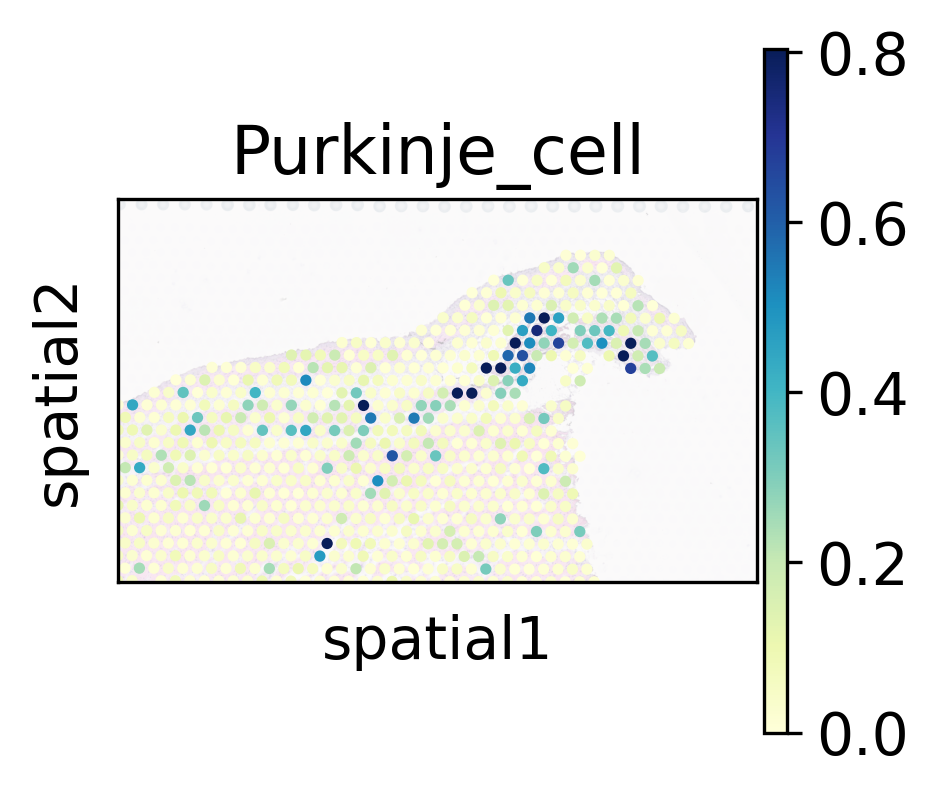

In [25]:
with mpl.rc_context({'figure.figsize': [3, 3],
                            'axes.titlesize':16,}):
    sc.pl.spatial(slide,cmap='YlGnBu',
                  color=['Purkinje_cell'], 
                  ncols=6, wspace=0.25,
                  size=0,img_key='hires',alpha_img=1,vmin=0, vmax='p99.4',
                  save='_Purkinje-cell_HE.pdf',
                  crop_coord=[5000, 15000, 1000, 7000],
                 )

with mpl.rc_context({'figure.figsize': [3, 3],
                            'axes.titlesize':16,}):
    sc.pl.spatial(slide,cmap='YlGnBu',
                  color=['Purkinje_cell'], 
                  ncols=6, wspace=0.25,
                  size=1.2,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.6',
                  save='_Purkinje-cell.pdf',
                  crop_coord=[5000, 15000, 1000, 7000],
                 )